In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC

In [2]:
df = pd.read_csv('wine.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [3]:
data = df.drop('label', axis=1)
label = df['label']

In [4]:
train_d, test_d, train_l, test_l = train_test_split(data, label, test_size=0.3, random_state=0)

In [6]:
param_grid = {'n_estimators': [1, 4, 7, 10, 20], 'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(RFC(), param_grid, cv=4)
clf.fit(train_d, train_l)
res = pd.DataFrame(clf.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004829,0.000688,0.002236,0.000183,1,0,"{'n_estimators': 1, 'random_state': 0}",0.806452,0.838710,0.935484,0.903226,0.870968,0.051004,49
1,0.003902,0.000434,0.001787,0.000120,1,1,"{'n_estimators': 1, 'random_state': 1}",0.774194,0.903226,0.903226,0.935484,0.879032,0.061945,48
2,0.003269,0.000121,0.001685,0.000107,1,2,"{'n_estimators': 1, 'random_state': 2}",0.903226,0.903226,0.967742,0.806452,0.895161,0.057592,46
3,0.003606,0.000694,0.001907,0.000354,1,3,"{'n_estimators': 1, 'random_state': 3}",0.806452,0.903226,0.903226,0.870968,0.870968,0.039508,49
4,0.003297,0.000166,0.001545,0.000033,1,4,"{'n_estimators': 1, 'random_state': 4}",0.903226,1.000000,0.903226,0.838710,0.911290,0.057592,42


In [10]:
res.sort_values('rank_test_score').head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,0.022245,0.000709,0.002980,0.000105,20,10,"{'n_estimators': 20, 'random_state': 10}",0.935484,1.000000,1.0,1.000000,0.983871,0.027936,1
52,0.021991,0.000661,0.002891,0.000109,20,8,"{'n_estimators': 20, 'random_state': 8}",0.935484,1.000000,1.0,0.967742,0.975806,0.026747,2
30,0.009771,0.000377,0.002396,0.000583,7,8,"{'n_estimators': 7, 'random_state': 8}",0.935484,1.000000,1.0,0.967742,0.975806,0.026747,2
49,0.021595,0.000054,0.002961,0.000243,20,5,"{'n_estimators': 20, 'random_state': 5}",0.935484,1.000000,1.0,0.967742,0.975806,0.026747,2
48,0.021626,0.000031,0.002840,0.000003,20,4,"{'n_estimators': 20, 'random_state': 4}",0.935484,1.000000,1.0,0.967742,0.975806,0.026747,2
32,0.008972,0.000018,0.001958,0.000007,7,10,"{'n_estimators': 7, 'random_state': 10}",0.935484,0.967742,1.0,0.967742,0.967742,0.022810,6


In [22]:
n_estimators = res[res['rank_test_score'] == 1].param_n_estimators.values[0]
random_state = res[res['rank_test_score'] == 1].param_random_state.values[0]

In [23]:
scores = []
for i in range(1000):
    train_d, test_d, train_l, test_l = train_test_split(data, label, test_size=0.3, random_state=i)
    clf = RFC(n_estimators=n_estimators, random_state=random_state)
    clf.fit(train_d, train_l)
    scores.append(clf.score(test_d, test_l))
    
print(f"n_estimators={n_estimators}, random_state={random_state}\n\tAveScore: {np.mean(scores)*100:.3f}%\tStd: {np.std(scores):.3f}")

n_estimators=20, random_state=10	AveScore: 97.531%


In [29]:
print(f"n_estimators={n_estimators}, random_state={random_state}\n\tAveScore: {np.mean(scores)*100:.3f}%\tStd: {np.std(scores)*100:.3f}%")

n_estimators=20, random_state=10
	AveScore: 97.531%	Std: 2.020%


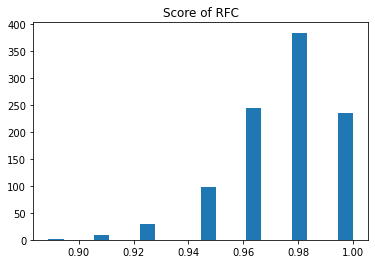

In [27]:
from matplotlib import pyplot as plt

plt.hist(scores, bins=20)
plt.title('Score of RFC')
plt.show()